# Proyecto Mineria de datos (Determinar si el peso del bebe es bajo o no)
## Modelos de Machine Learning

Javier Mombiela 20067, Jose Hernandez 20053, Javier Valle 20159, Roberto Rios 20979, Pablo Gonzalez 20362

Como primer punto empezamos leyendo el archivo de entrada y limpiando los datos es decir eliminando la columna de datos que tiene datos nulos en esta caso estos datos se representan con un 99 o un 999

In [1]:
import pandas as pd

# Lee el archivo CSV
data = pd.read_csv('data_set_completo.csv')
print(data.shape)
columns_to_check = ['Libras', 'Onzas', 'Tohite', 'Tohim', 'Tohivi','Edadm']
data = data[~data[columns_to_check].isin([99,999]).any(axis=1)]
print(data.shape)
# Calcula la nueva columna "peso_bebe"
data['peso_bebe'] = data['Libras'] + (data['Onzas'] / 16)
data['classification'] = data['peso_bebe'].apply(lambda x: 0 if x <= 5.5 else 1)
data = data.drop("Unnamed: 0", axis=1)


(1091330, 43)
(1068100, 43)


##### Visualización de la data

In [2]:
print(data.head())

   Depreg  Mupreg  Mesreg  Añoreg  TipoIns  Depocu  Mupocu  Libras  Onzas  \
0       1     115      10    2018        3       1     101       5     12   
1       1     106      10    2018        3       1     101       6     12   
2       1     101       4    2018        3       1     101       6      8   
3      21    2106       4    2018        3      21    2106       6      8   
4      18    1805      10    2018        3      18    1805       9      1   

   Diaocu  ...  Mupnam  Escolam  Ocupam  Asisrec  Sitioocu  Tohite  Tohim  \
0      17  ...     101        2      97        3         4       3      0   
1       8  ...     106        4      97        3         4       1      0   
2      12  ...     101        3      97        3         4       1      0   
3      11  ...     507        4      97        3         4       2      0   
4       4  ...    1909        1      97        3         4      12      0   

   Tohivi  peso_bebe  classification  
0       3     5.7500               

Para la selección de variables de nuestro modelo primero empezamos realizando una prueba de correlación para las variables cuantitativas y una prueba de chi cuadrado a partir de las variables categóricas.

In [3]:
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr



# Variables categóricas
variables_categoricas = ['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Sexo', 'Diaocu', 'Mesocu',
                         'Tipar',"ViaPar", 'Deprem', 'Muprem', 'Escivm', 'Asisrec', 'Sitioocu', 'classification']

# Variables cuantitativas
variables_cuantitativas = ['Edadm', 'Tohite', 'Tohim', 'Tohivi', 'peso_bebe', 'classification']

# Prueba de chi-cuadrado para las variables categóricas
chi2_results = {}
for variable in variables_categoricas:
    contingency_table = pd.crosstab(data[variable], data['classification'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[variable] = (chi2, p_value)

# Prueba de correlación para las variables cuantitativas
correlation_results = {}
for variable in variables_cuantitativas:
    correlation, p_value = pearsonr(data[variable], data['classification'])
    correlation_results[variable] = (correlation, p_value)

# Imprimir los resultados de la prueba de chi-cuadrado
print("Resultados de la prueba de chi-cuadrado:")
for variable, (chi2, p_value) in chi2_results.items():
    print(f"{variable}: Chi2 = {chi2}, p-value = {p_value}")

# Imprimir los resultados de la prueba de correlación
print("\nResultados de la prueba de correlación:")
for variable, (correlation, p_value) in correlation_results.items():
    print(f"{variable}: Correlation = {correlation}, p-value = {p_value}")


Resultados de la prueba de chi-cuadrado:
Depreg: Chi2 = 6832.266882298631, p-value = 0.0
Mupreg: Chi2 = 20388.81711156488, p-value = 0.0
Mesreg: Chi2 = 53.37303899606705, p-value = 1.5355496733228042e-07
Añoreg: Chi2 = 344.610648183958, p-value = 2.1908253566861935e-74
Depocu: Chi2 = 6981.452355685638, p-value = 0.0
Mupocu: Chi2 = 22760.8091260673, p-value = 0.0
Sexo: Chi2 = 2113.0520258143033, p-value = 0.0
Diaocu: Chi2 = 28.339176910958727, p-value = 0.5524682922470174
Mesocu: Chi2 = 91.08186403450352, p-value = 1.0229633437017034e-14
Tipar: Chi2 = 47621.01315566545, p-value = 0.0
ViaPar: Chi2 = 5549.956419088421, p-value = 0.0
Deprem: Chi2 = 5785.262634371842, p-value = 0.0
Muprem: Chi2 = 11766.942272249005, p-value = 0.0
Escivm: Chi2 = 179.6825169716514, p-value = 1.0328263621454905e-38
Asisrec: Chi2 = 3522.2004720742025, p-value = 0.0
Sitioocu: Chi2 = 4665.275417342266, p-value = 0.0
classification: Chi2 = 1068091.1601804898, p-value = 0.0

Resultados de la prueba de correlación:


Al realizar las pruebas correspondientes estas serían las variables las cuales se podrían tomar en cuenta por su relación con la variable de classification:
Depreg
Mupreg
Depocu
Mupocu
Sexo
Tipar
ViaPar
Deprem
Muprem
Asisrec
Sitioocu
Edadm
Tohite
Tohim
Tohivi


Cabe la pena mencionar que se estuvieron realizando pruebas con varios modelos para ver cual era la combinacion de variables las cuales sacaban los mejores modelos tas la realizacion de estas pruebas las variaables seleccionadas para realizar nuestros modelos son las siguientes: 'Sexo','Tipar',"ViaPar",'Sitioocu',"Mupocu" ,'classification'


## Cojuntos de entrenamiento y prueba

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler



variables_seleccionadas = ['Sexo','Tipar',"ViaPar",'Sitioocu',"Mupocu" ,'classification']
data_selected = data[variables_seleccionadas]


# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = data_selected.drop('classification', axis=1)
y = data_selected['classification']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Cojuntos de entrenamiento")
print(X_train.shape)
print(y_train.shape)
print("Cojuntos de prueba")
print(X_test.shape)
print(y_test.shape)

Cojuntos de entrenamiento
(747670, 5)
(747670,)
Cojuntos de prueba
(320430, 5)
(320430,)


Como se puede visualizar en los conjuntos de entrenamiento y prueba estos están balanceados que el conjunto de entrenamiento cuenta con alrededor de 70% de los datos mientras que el conjunto de prueba cuenta con un 30% de los datos haciendo un total del 100% de los datos

## Regresión logística

#### Primer modelo de regresion Logistica 

              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.82      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Precisión en el conjunto de entrenamiento: 0.8767651504005778
Precisión en el conjunto de prueba: 0.8759323409168929
[[  3019  38860]
 [   895 277656]]


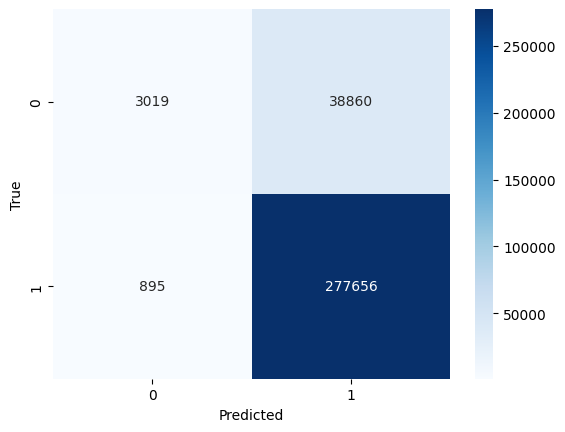

In [28]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=200)

# Entrenar el modelo
model.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Imprimir la precisión en ambos conjuntos


Para nuestro primer modelo se puede mencionar que la precisión para la clase 0 es del 0.77, lo que significa que el 77% de las predicciones clasificadas como clase 0 son correctas. La precisión para la clase 1 es del 0.88, lo que indica que el 88% de las predicciones clasificadas como clase 1 son correctas.

La matriz de confusión  muestra los resultados de las predicciones en forma de una matriz. En este caso, hay 3019 instancias clasificadas correctamente como clase 0 (verdaderos negativos), 38860 instancias clasificadas incorrectamente como clase 0 (falsos negativos), 895 instancias clasificadas incorrectamente como clase 1 (falsos positivos) y 277656 instancias clasificadas correctamente como clase 1 (verdaderos positivos).

En resumen, el modelo parece tener un rendimiento alto para la clase 1, con una alta precisión. Sin embargo, muestra un rendimiento más bajo para la clase 0, con una precisión y recall más bajos.

En general, se espera que la precisión en el conjunto de entrenamiento sea mayor que la precisión en el conjunto de prueba cuando hay sobreajuste. Esto se debe a que el modelo puede memorizar los datos de entrenamiento en lugar de aprender patrones generalizables. En nuestro caso, las precisiones en ambos conjuntos son bastante cercanas, lo que indica que el modelo está logrando un buen equilibrio entre el ajuste a los datos de entrenamiento y la capacidad de generalización a nuevos datos por lo que se puede estimar que no exciste un sobreajustamiento. 


#### Segundo modelo de regresion Logistica 

              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.82      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Precisión en el conjunto de entrenamiento: 0.8767651504005778
Precisión en el conjunto de prueba: 0.8759323409168929
[[  3019  38860]
 [   895 277656]]


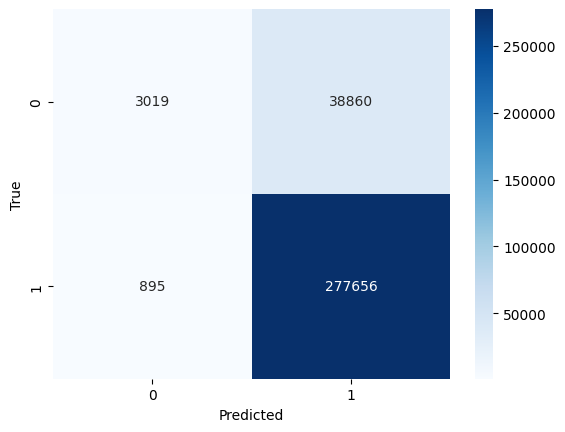

In [31]:
# Crear el modelo de regresión logística
model2 = LogisticRegression(solver="saga",max_iter=400)

# Entrenar el modelo
model2.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_predL2 = model2.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_predL2))

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)


cm2 = confusion_matrix(y_test, y_predL2)
print(cm2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Para nuestro segundo modelo se puede mencionar que la precisión para la clase 0 es del 0.77, lo que significa que el 77% de las predicciones clasificadas como clase 0 son correctas. La precisión para la clase 1 es del 0.88, lo que indica que el 88% de las predicciones clasificadas como clase 1 son correctas.

La matriz de confusión  muestra los resultados de las predicciones en forma de una matriz. En este caso, hay 3019 instancias clasificadas correctamente como clase 0 (verdaderos negativos), 38860 instancias clasificadas incorrectamente como clase 0 (falsos negativos), 895 instancias clasificadas incorrectamente como clase 1 (falsos positivos) y 277656 instancias clasificadas correctamente como clase 1 (verdaderos positivos).

En resumen, el modelo parece tener un rendimiento alto para la clase 1, con una alta precisión. Sin embargo, muestra un rendimiento más bajo para la clase 0, con una precisión y recall más bajos.

En general, se espera que la precisión en el conjunto de entrenamiento sea mayor que la precisión en el conjunto de prueba cuando hay sobreajuste. Esto se debe a que el modelo puede memorizar los datos de entrenamiento en lugar de aprender patrones generalizables. En nuestro caso, las precisiones en ambos conjuntos son bastante cercanas, lo que indica que el modelo está logrando un buen equilibrio entre el ajuste a los datos de entrenamiento y la capacidad de generalización a nuevos datos por lo que se puede estimar que no exciste un sobreajustamiento. 

#### Tercer modelo de regresion Logistica 

              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.82      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Precisión en el conjunto de entrenamiento: 0.8767651504005778
Precisión en el conjunto de prueba: 0.8759323409168929
[[  3019  38860]
 [   895 277656]]


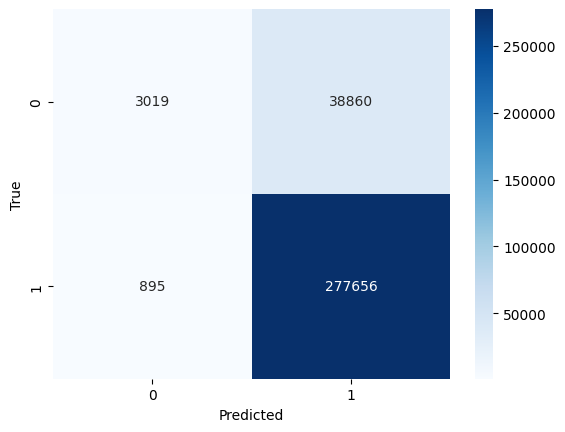

In [32]:
# Crear el modelo de regresión logística
model3 = LogisticRegression(solver="newton-cg",max_iter=1000)

# Entrenar el modelo
model2.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_predL2 = model2.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_predL2))

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)


cm = confusion_matrix(y_test, y_predL2)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Para nuestro tercer modelo se puede mencionar que la precisión para la clase 0 es del 0.77, lo que significa que el 77% de las predicciones clasificadas como clase 0 son correctas. La precisión para la clase 1 es del 0.88, lo que indica que el 88% de las predicciones clasificadas como clase 1 son correctas.

La matriz de confusión  muestra los resultados de las predicciones en forma de una matriz. En este caso, hay 3019 instancias clasificadas correctamente como clase 0 (verdaderos negativos), 38860 instancias clasificadas incorrectamente como clase 0 (falsos negativos), 895 instancias clasificadas incorrectamente como clase 1 (falsos positivos) y 277656 instancias clasificadas correctamente como clase 1 (verdaderos positivos).

En resumen, el modelo parece tener un rendimiento alto para la clase 1, con una alta precisión. Sin embargo, muestra un rendimiento más bajo para la clase 0, con una precisión y recall más bajos.

En general, se espera que la precisión en el conjunto de entrenamiento sea mayor que la precisión en el conjunto de prueba cuando hay sobreajuste. Esto se debe a que el modelo puede memorizar los datos de entrenamiento en lugar de aprender patrones generalizables. En nuestro caso, las precisiones en ambos conjuntos son bastante cercanas, lo que indica que el modelo está logrando un buen equilibrio entre el ajuste a los datos de entrenamiento y la capacidad de generalización a nuevos datos por lo que se puede estimar que no exciste un sobreajustamiento. 

Errores de validación cruzada en el conjunto de entrenamiento: [0.12348362 0.12303556 0.12294863 0.12343012 0.12327631]
Error medio de validación cruzada en el conjunto de entrenamiento: 0.12323484959942219
Errores de validación cruzada en el conjunto de prueba: [0.12400524 0.1242081  0.12391162 0.12445776 0.12375558]
Error medio de validación cruzada en el conjunto de prueba: 0.12406765908310706


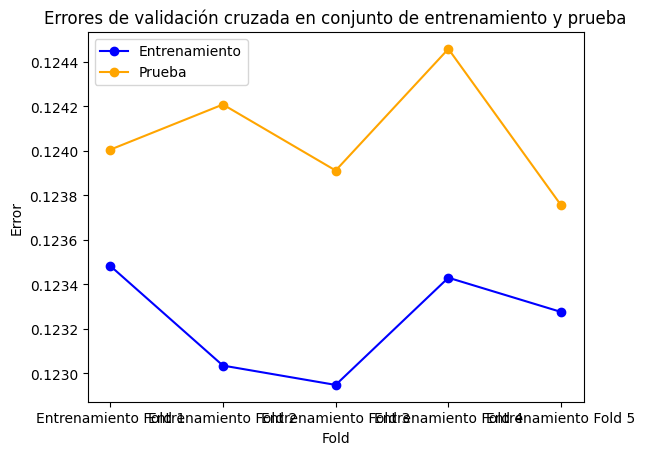

In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Realizar validación cruzada con 5 divisiones en los datos de entrenamiento
train_scores1 = cross_val_score(model, X_train, y_train, cv=5)

# Calcular los errores de validación cruzada en el conjunto de entrenamiento
train_errors1 = 1 - train_scores1

# Realizar validación cruzada con 5 divisiones en los datos de prueba
test_scores1 = cross_val_score(model, X_test, y_test, cv=5)

# Calcular los errores de validación cruzada en el conjunto de prueba
test_errors1 = 1 - test_scores1

# Imprimir los errores de validación cruzada en el conjunto de entrenamiento
print("Errores de validación cruzada en el conjunto de entrenamiento:", train_errors1)
print("Error medio de validación cruzada en el conjunto de entrenamiento:", train_errors1.mean())

# Imprimir los errores de validación cruzada en el conjunto de prueba
print("Errores de validación cruzada en el conjunto de prueba:", test_errors1)
print("Error medio de validación cruzada en el conjunto de prueba:", test_errors1.mean())

labels = ['Entrenamiento Fold 1', 'Entrenamiento Fold 2', 'Entrenamiento Fold 3', 'Entrenamiento Fold 4', 'Entrenamiento Fold 5']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los errores de validación cruzada en el conjunto de entrenamiento
ax.plot(labels, train_errors1, marker='o', linestyle='-', color='blue', label='Entrenamiento')

# Graficar los errores de validación cruzada en el conjunto de prueba
ax.plot(labels, test_errors1, marker='o', linestyle='-', color='orange', label='Prueba')

# Agregar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Fold')
ax.set_ylabel('Error')
ax.set_title('Errores de validación cruzada en conjunto de entrenamiento y prueba')

# Mostrar la gráfica
plt.show()

En general, si el error medio de validación cruzada en el conjunto de entrenamiento es significativamente menor que el error medio de validación cruzada en el conjunto de prueba, esto puede indicar un posible sobreajuste. Esto significa que el modelo puede estar ajustándose demasiado a los datos de entrenamiento y no generalizando bien a nuevos datos. Sin embargo, en este modelo, los errores medios de validación cruzada en el conjunto de entrenamiento y prueba son bastante similares (0.1232 y 0.1241 respectivamente). Esto sugiere que el modelo no está sufriendo de un sobreajuste significativo, ya que los errores en ambos conjuntos son comparables. Tambien se puede visualizar en la grafica que los dos modelos van corvengiendo hacia un mismo punto.

## Redes neuronales


### Neural network: multi-layer perceptron 3,4

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [7]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)



Matriz de confusión
 [[  3019  38860]
 [   895 277656]]
Accuracy:  0.8759323409168929
Precision:  0.8759323409168929
recall:  0.8759323409168929


Matriz de confusión:

Verdaderos positivos (TP): 3019
Falsos positivos (FP): 38860
Falsos negativos (FN): 895
Verdaderos negativos (TN): 277656
Accuracy: 0.8759

La precisión general del modelo es del 87.59%, lo que indica que aproximadamente el 87.59% de las predicciones realizadas por el modelo son correctas.
Precision: 0.8759

La precisión es del 87.59%, lo que significa que el 87.59% de las muestras clasificadas como positivas por el modelo son realmente positivas.
Recall: 0.8759

El recall, también conocido como sensibilidad o tasa de verdaderos positivos, es del 87.59%. Esto indica que el modelo es capaz de identificar correctamente el 87.59% de todas las muestras positivas.

### Neural network: multi-layer perceptron 10,2


In [8]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=100, learning_rate="constant", learning_rate_init=0.1)
mlp2.fit(X_train,y_train)
y_pred2 = mlp2.predict(X_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
cm2 = confusion_matrix(y_test,y_pred2)
accuracy2=accuracy_score(y_test,y_pred2)
precision2 =precision_score(y_test, y_pred2,average='micro')
recall2 =  recall_score(y_test, y_pred2,average='micro')
f12 = f1_score(y_test,y_pred2,average='micro')
print('Matriz de confusión\n',cm2)
print('Accuracy: ',accuracy2)
print('Precision: ', precision2)
print('recall: ',recall2)

Matriz de confusión
 [[     0  41879]
 [     0 278551]]
Accuracy:  0.8693037480885061
Precision:  0.8693037480885061
recall:  0.8693037480885061


Matriz de confusión: La matriz de confusión muestra que el modelo predijo correctamente todos los casos de la clase 1 (278,551) pero no predijo correctamente ningún caso de la clase 0 (41,879). Esto indica que el modelo tiene un desempeño deficiente al predecir la clase 0.

Accuracy: El accuracy del modelo es de 0.8693, lo que significa que aproximadamente el 86.93% de las predicciones son correctas. Sin embargo, dado que el modelo no predijo correctamente ningún caso de la clase 0, esta métrica puede ser engañosa y no reflejar adecuadamente el rendimiento del modelo.

Precision: La precisión del modelo es de 0.8693, lo que indica que el 86.93% de las predicciones positivas son correctas. Dado que el modelo no predijo ningún caso de la clase 0, la precisión para esa clase es 0.

Recall: El recall del modelo es de 0.8693, lo que indica que el 86.93% de los casos positivos reales fueron identificados correctamente. Sin embargo, dado que el modelo no predijo ningún caso de la clase 0, el recall para esa clase también es 0.

### Neural network: multi-layer perceptron 5,3

In [10]:
mlp3 = MLPClassifier(hidden_layer_sizes=(5,3), max_iter=500, learning_rate="constant", learning_rate_init=1)
mlp3.fit(X_train,y_train)
y_pred3 = mlp3.predict(X_test)
y_pred3


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
cm3 = confusion_matrix(y_test,y_pred3)
accuracy3=accuracy_score(y_test,y_pred3)
precision3 =precision_score(y_test, y_pred3,average='micro')
recall3 =  recall_score(y_test, y_pred3,average='micro')
f13 = f1_score(y_test,y_pred3,average='micro')
print('Matriz de confusión\n',cm3)
print('Accuracy: ',accuracy3)
print('Precision: ', precision3)
print('recall: ',recall3)

Matriz de confusión
 [[     0  41879]
 [     0 278551]]
Accuracy:  0.8693037480885061
Precision:  0.8693037480885061
recall:  0.8693037480885061


Matriz de confusión: La matriz de confusión muestra que el modelo predijo correctamente todos los casos de la clase 1 (278,551) pero no predijo correctamente ningún caso de la clase 0 (41,879). Esto indica que el modelo tiene un desempeño deficiente al predecir la clase 0.

Accuracy: El accuracy del modelo es de 0.8693, lo que significa que aproximadamente el 86.93% de las predicciones son correctas. Sin embargo, dado que el modelo no predijo correctamente ningún caso de la clase 0, esta métrica puede ser engañosa y no reflejar adecuadamente el rendimiento del modelo.

Precision: La precisión del modelo es de 0.8693, lo que indica que el 86.93% de las predicciones positivas son correctas. Dado que el modelo no predijo ningún caso de la clase 0, la precisión para esa clase es 0.

Recall: El recall del modelo es de 0.8693, lo que indica que el 86.93% de los casos positivos reales fueron identificados correctamente. Sin embargo, dado que el modelo no predijo ningún caso de la clase 0, el recall para esa clase también es 0.

### Neural network: multi-layer perceptron 3,2

In [12]:
mlp4 = MLPClassifier(hidden_layer_sizes=(3,2), max_iter=1000, learning_rate="constant", learning_rate_init=10)
mlp4.fit(X_train,y_train)
y_pred4 = mlp4.predict(X_test)
y_pred4

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
cm4 = confusion_matrix(y_test,y_pred4)
accuracy4=accuracy_score(y_test,y_pred4)
precision4 =precision_score(y_test, y_pred4,average='micro')
recall4 =  recall_score(y_test, y_pred4,average='micro')
f14 = f1_score(y_test,y_pred4,average='micro')
print('Matriz de confusión\n',cm4)
print('Accuracy: ',accuracy4)
print('Precision: ', precision4)
print('recall: ',recall4)

Matriz de confusión
 [[     0  41879]
 [     0 278551]]
Accuracy:  0.8693037480885061
Precision:  0.8693037480885061
recall:  0.8693037480885061


Matriz de confusión: La matriz de confusión muestra que el modelo predijo correctamente todos los casos de la clase 1 (278,551) pero no predijo correctamente ningún caso de la clase 0 (41,879). Esto indica que el modelo tiene un desempeño deficiente al predecir la clase 0.

Accuracy: El accuracy del modelo es de 0.8693, lo que significa que aproximadamente el 86.93% de las predicciones son correctas. Sin embargo, dado que el modelo no predijo correctamente ningún caso de la clase 0, esta métrica puede ser engañosa y no reflejar adecuadamente el rendimiento del modelo.

Precision: La precisión del modelo es de 0.8693, lo que indica que el 86.93% de las predicciones positivas son correctas. Dado que el modelo no predijo ningún caso de la clase 0, la precisión para esa clase es 0.

Recall: El recall del modelo es de 0.8693, lo que indica que el 86.93% de los casos positivos reales fueron identificados correctamente. Sin embargo, dado que el modelo no predijo ningún caso de la clase 0, el recall para esa clase también es 0.

### Seleccion de modelo

Dado que las métricas de accuracy, precision y recall son idénticas para los modelos 2, 3 y 4, no hay diferencias discernibles entre ellos. Sin embargo, el modelo 1 tiene una precisión ligeramente más alta y una matriz de confusión que indica un mejor rendimiento para la clase 0. En base a estas métricas , se puede concluir que el Modelo 1 parece ser el mejor entre los 4 modelos de redes neuronales, ya que tiene una precisión y un recall más altos en comparación con los demás modelos.

Errores de validación cruzada en el conjunto de entrenamiento: [0.12348362 0.12974976 0.12294863 0.12343012 0.12327631]
Error medio de validación cruzada en el conjunto de entrenamiento: 0.12457768801744082
Errores de validación cruzada en el conjunto de prueba: [0.12400524 0.1242081  0.12411447 0.12445776 0.12375558]
Error medio de validación cruzada en el conjunto de prueba: 0.12410822956651997


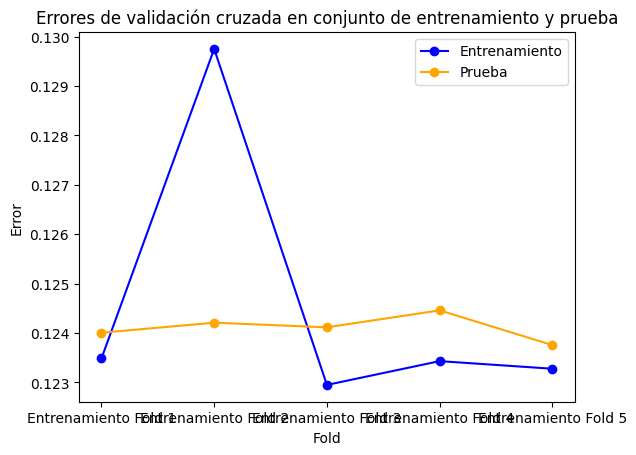

In [51]:
# Realizar validación cruzada con 5 divisiones en los datos de entrenamiento
train_scores2 = cross_val_score(mlp, X_train, y_train, cv=5)

# Calcular los errores de validación cruzada en el conjunto de entrenamiento
train_errors2 = 1 - train_scores2

# Realizar validación cruzada con 5 divisiones en los datos de prueba
test_scores2 = cross_val_score(mlp, X_test, y_test, cv=5)

# Calcular los errores de validación cruzada en el conjunto de prueba
test_errors2 = 1 - test_scores2

# Imprimir los errores de validación cruzada en el conjunto de entrenamiento
print("Errores de validación cruzada en el conjunto de entrenamiento:", train_errors2)
print("Error medio de validación cruzada en el conjunto de entrenamiento:", train_errors2.mean())

# Imprimir los errores de validación cruzada en el conjunto de prueba
print("Errores de validación cruzada en el conjunto de prueba:", test_errors2)
print("Error medio de validación cruzada en el conjunto de prueba:", test_errors2.mean())

labels = ['Entrenamiento Fold 1', 'Entrenamiento Fold 2', 'Entrenamiento Fold 3', 'Entrenamiento Fold 4', 'Entrenamiento Fold 5']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los errores de validación cruzada en el conjunto de entrenamiento
ax.plot(labels, train_errors2, marker='o', linestyle='-', color='blue', label='Entrenamiento')

# Graficar los errores de validación cruzada en el conjunto de prueba
ax.plot(labels, test_errors2, marker='o', linestyle='-', color='orange', label='Prueba')

# Agregar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Fold')
ax.set_ylabel('Error')
ax.set_title('Errores de validación cruzada en conjunto de entrenamiento y prueba')

# Mostrar la gráfica
plt.show()

Como se puede visualizar en la grafica del crossValidation para las redes neuronales se puede ver que en Fold 5 de la redes se muestra un pico significativo y luego disminuye, esto puede indicar que el modelo está sufriendo de sobreajuste en ciertos puntos o intervalos durante el entrenamiento. Este pico en la línea de entrenamiento sugiere que el modelo puede estar ajustándose demasiado a los datos de entrenamiento en esa etapa específica del entrenamiento. Esto podría resultar en un rendimiento inferior en los datos de prueba o en nuevos datos esto es un indicador que el modeloe sta sobre ajustado.

### Tree classifier

#### Modelo 1 Tree classifier max_depth = 4

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your features and labels stored in X and y, respectively

# Create a decision tree classifier
dtclf = DecisionTreeClassifier(max_depth= 4,random_state=42)

# Train the classifier
dtclf.fit(X_train, y_train)

# Make predictions on the test set
y_predD = dtclf.predict(X_test)

# Calculate the accuracy of the model
print(classification_report(y_test, y_predD))
accuracy = accuracy_score(y_test, y_predD)
print("Accuracy:", accuracy)
print ("Precision:", precision_score(y_test,y_predD,average='weighted') )
print ("Recall: ", recall_score(y_test,y_predD,average='weighted'))


              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.82      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Accuracy: 0.8759323409168929
Precision: 0.863386092418084
Recall:  0.8759323409168929


 La precisión para la clase 0 es de 0.77, lo que indica que el 77% de las predicciones positivas para la clase 0 son correctas. La precisión para la clase 1 es de 0.88, lo que indica que el 88% de las predicciones positivas para la clase 1 son correctas. En resumen, el modelo de árboles de decisión muestra una alta precisión en la predicción de la clase 1, con un recall perfecto y un alto F1-score. Sin embargo, el modelo tiene un bajo recall y F1-score para la clase 0, lo que indica que no se está identificando correctamente la clase minoritaria. Es importante considerar el desequilibrio de clases y posibles ajustes en el modelo para mejorar la capacidad de predicción de la clase 0.

Confusion Matrix:
[[  3019  38860]
 [   895 277656]]


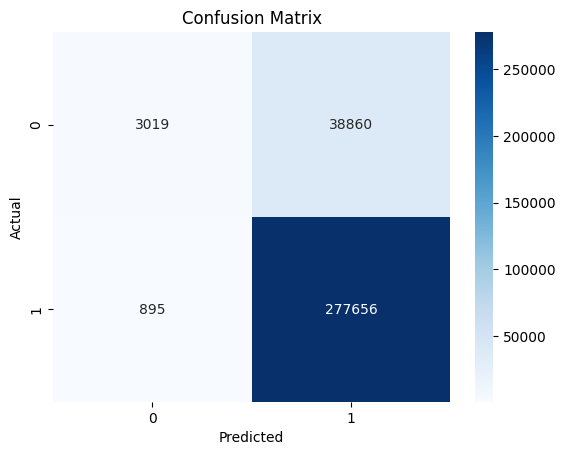

In [46]:
# Generate the confusion matrix
dtclfM = confusion_matrix(y_test, y_predD)
print("Confusion Matrix:")
print(dtclfM)

# Create a heatmap of the confusion matrix
sns.heatmap(dtclfM, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Modelo 2 Tree classifier max_depth = 8

In [47]:

dtclf2 = DecisionTreeClassifier(max_depth= 8,random_state=42)

# Train the classifier
dtclf2.fit(X_train, y_train)

# Make predictions on the test set
y_predD2 = dtclf2.predict(X_test)

# Calculate the accuracy of the model
print(classification_report(y_test, y_predD2))
accuracy = accuracy_score(y_test, y_predD2)
print("Accuracy:", accuracy)
print ("Precision:", precision_score(y_test,y_predD2,average='weighted') )
print ("Recall: ", recall_score(y_test,y_predD2,average='weighted'))


              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.83      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Accuracy: 0.8758262334987361
Precision: 0.8635330570031827
Recall:  0.8758262334987361


Confusion Matrix:
[[  2955  38924]
 [   865 277686]]


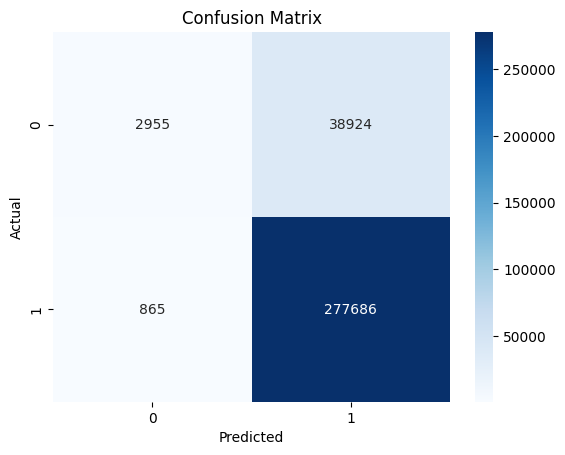

In [22]:
# Generate the confusion matrix
dtclfD2 = confusion_matrix(y_test, y_predD2)
print("Confusion Matrix:")
print(dtclfD2)

# Create a heatmap of the confusion matrix
sns.heatmap(dtclfD2, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

La precisión para la clase 0 es de 0.77, lo que indica que aproximadamente el 77% de las predicciones positivas para la clase 0 son correctas. Para la clase 1, la precisión es de 0.88, lo que indica que aproximadamente el 88% de las predicciones positivas para la clase 1 son correctas. En resumen, el modelo de árboles de decisión tiene una precisión relativamente baja para la clase 0 y un recall muy bajo. Esto indica que el modelo tiene dificultades para identificar correctamente los casos de la clase 0. Por otro lado, tiene una alta precisión y recall para la clase 1, lo que sugiere que el modelo es bueno para identificar los casos de la clase 1. Sin embargo, es importante tener en cuenta que el rendimiento general del modelo puede variar dependiendo de la importancia relativa de cada clase y los objetivos específicos del problema.

#### Modelo 3 Tree classifier max_depth = 12

In [48]:
dtclf3 = DecisionTreeClassifier(max_depth= 12,random_state=42)

# Train the classifier
dtclf3.fit(X_train, y_train)

# Make predictions on the test set
y_predD3 = dtclf3.predict(X_test)

# Calculate the accuracy of the model
print(classification_report(y_test, y_predD3))
accuracy = accuracy_score(y_test, y_predD3)
print("Accuracy:", accuracy)
print ("Precision:", precision_score(y_test,y_predD3,average='weighted') )
print ("Recall: ", recall_score(y_test,y_predD3,average='weighted'))


              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.83      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Accuracy: 0.8757606965639921
Precision: 0.8635372385518031
Recall:  0.8757606965639921


Confusion Matrix:
[[  2921  38958]
 [   852 277699]]


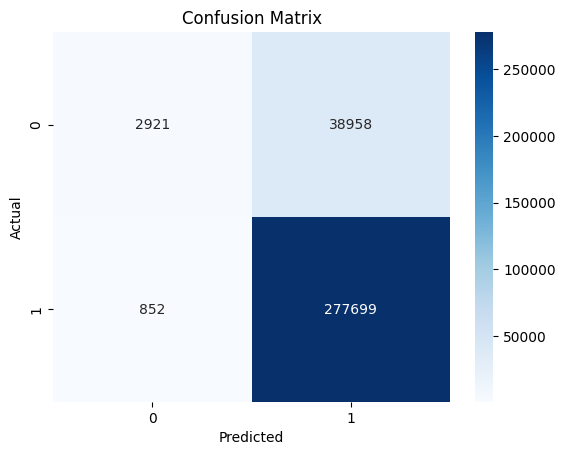

In [25]:
# Generate the confusion matrix
dtclfD3 = confusion_matrix(y_test, y_predD3)
print("Confusion Matrix:")
print(dtclfD3)

# Create a heatmap of the confusion matrix
sns.heatmap(dtclfD3, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

La precisión para la clase 0 es de 0.77, lo que indica que aproximadamente el 77% de las predicciones positivas para la clase 0 son correctas. Para la clase 1, la precisión es de 0.88, lo que indica que aproximadamente el 88% de las predicciones positivas para la clase 1 son correctas. En resumen, el modelo de árboles de decisión tiene una precisión relativamente baja para la clase 0 y un recall muy bajo. Esto indica que el modelo tiene dificultades para identificar correctamente los casos de la clase 0. Por otro lado, tiene una alta precisión y recall para la clase 1, lo que sugiere que el modelo es bueno para identificar los casos de la clase 1. Sin embargo, es importante tener en cuenta que el rendimiento general del modelo puede variar dependiendo de la importancia relativa de cada clase y los objetivos específicos del problema.

### Seleccion de modelo

Basándonos en el accuracy, los tres modelos tienen resultados muy similares y están cerca del 88% de precisión. Sin embargo, si comparamos las métricas de precision y recall, también podemos ver que los tres modelos tienen resultados similares en ambas métricas. Dado que los tres modelos tienen resultados muy cercanos en todas las métricas de evaluación, no se puede detrerminar cual es el mejor para este punto pero se puede mencionar que el que acerto mas vaces la variable 0 es el modelo 1 como se puede visualizar en su matriz de confusion por lo que este seria el modelo que se seleccionara.

Errores de validación cruzada en el conjunto de entrenamiento: [0.12348362 0.12303556 0.12294863 0.12343012 0.12327631]
Error medio de validación cruzada en el conjunto de entrenamiento: 0.12323484959942219
Errores de validación cruzada en el conjunto de prueba: [0.12400524 0.1242081  0.12391162 0.12452018 0.12375558]
Error medio de validación cruzada en el conjunto de prueba: 0.12408014230877258


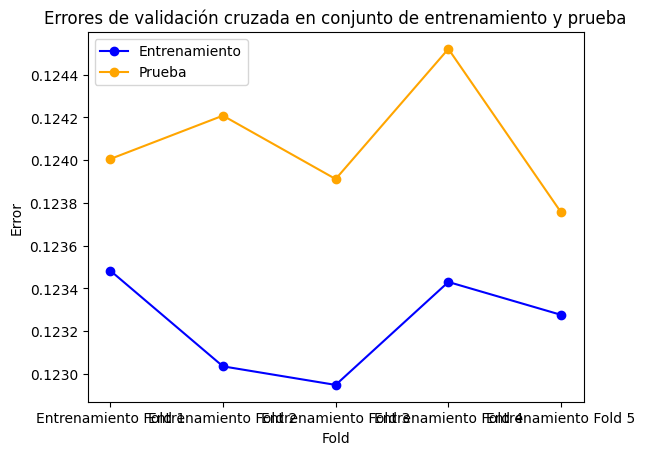

In [50]:
# Realizar validación cruzada con 5 divisiones en los datos de entrenamiento
train_scores3 = cross_val_score(dtclf, X_train, y_train, cv=5)

# Calcular los errores de validación cruzada en el conjunto de entrenamiento
train_errors3 = 1 - train_scores3

# Realizar validación cruzada con 5 divisiones en los datos de prueba
test_scores3 = cross_val_score(dtclf, X_test, y_test, cv=5)

# Calcular los errores de validación cruzada en el conjunto de prueba
test_errors3 = 1 - test_scores3

# Imprimir los errores de validación cruzada en el conjunto de entrenamiento
print("Errores de validación cruzada en el conjunto de entrenamiento:", train_errors3)
print("Error medio de validación cruzada en el conjunto de entrenamiento:", train_errors3.mean())

# Imprimir los errores de validación cruzada en el conjunto de prueba
print("Errores de validación cruzada en el conjunto de prueba:", test_errors3)
print("Error medio de validación cruzada en el conjunto de prueba:", test_errors3.mean())

labels = ['Entrenamiento Fold 1', 'Entrenamiento Fold 2', 'Entrenamiento Fold 3', 'Entrenamiento Fold 4', 'Entrenamiento Fold 5']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los errores de validación cruzada en el conjunto de entrenamiento
ax.plot(labels, train_errors3, marker='o', linestyle='-', color='blue', label='Entrenamiento')

# Graficar los errores de validación cruzada en el conjunto de prueba
ax.plot(labels, test_errors3, marker='o', linestyle='-', color='orange', label='Prueba')

# Agregar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Fold')
ax.set_ylabel('Error')
ax.set_title('Errores de validación cruzada en conjunto de entrenamiento y prueba')

# Mostrar la gráfica
plt.show()


En general, si el error medio de validación cruzada en el conjunto de entrenamiento es significativamente menor que el error medio de validación cruzada en el conjunto de prueba, esto puede indicar un posible sobreajuste. Esto significa que el modelo puede estar ajustándose demasiado a los datos de entrenamiento y no generalizando bien a nuevos datos. Sin embargo, en este modelo, los errores medios de validación cruzada en el conjunto de entrenamiento y prueba son bastante similares (0.1232 y 0.1241 respectivamente). Esto sugiere que el modelo no está sufriendo de un sobreajuste significativo, ya que los errores en ambos conjuntos son comparables.Tambien se puede visualizar en la grafica que los dos modelos van corvengiendo hacia un mismo punto.

## Seleccion del mejor modelo entre los 3 tipos de modelo

En comparación a los 3 modelos se puede mencionar que los 3 modelos cuentan con un accuracy igual que es de 0.8792 e iguales matrices de confusión por lo que en este punto los modelos son iguales, pero se puede mencionar que el segundo modelo de redes neuronales presenta un pequeño desajuste y aparte el tiempo de procesamiento de este fue de alrededor de 20 segundos por lo que fue un tiempo muy grande y en comparación a los otros dos que tardaron 1.9 segundos cada uno, por lo que se descarta este modelo, por último se puede concluir que cualquier modelo ya sea el mejor modelo de regresión logística o el mejor modelo de árboles de decisión es igualmente bueno respecto a todos los parámetros, pero se puede concluir que los dos modelos son igual de malos para predecir los 0 que en este caso es un bebe con un bajo peso ya que tuvieron un recall de 0.07 en esta variable por lo que se sugeriría buscar más variables que estén relacionadas con el bajo peso del bebe.